# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
## use of merging INNER

data_merged = pd.merge(study_results,mouse_metadata,on='Mouse ID')

# Display the data table for preview
data_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

## use of UNIQUE function

nbmice = len(data_merged['Mouse ID'].unique())
nbmice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

## use of DUPLICATE function on both columns ; Mouse ID, Timepoint

duplicates = data_merged.duplicated(subset=['Mouse ID','Timepoint'],keep=False)

data_duplicate = data_merged[duplicates]

## print if we need to control
#print(data_duplicate)


In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

## use UNIQUE function on the duplicate dataframe

badmouse = data_duplicate['Mouse ID'].unique()
badmouse

array(['g989'], dtype=object)

In [5]:
## create am array to be used in filtring

badmouse_df= pd.array(badmouse)
badmouse_df

<StringArray>
['g989']
Length: 1, dtype: string

In [6]:
# Optional: Get all the data for the duplicate mouse ID.

## use FILTRING and ISIN function with help of the array created above (badmouse)

duplicate_mice = data_merged[data_merged['Mouse ID'].isin(badmouse_df)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

## use filtring with opposit condition "~" to the filter above

clean_df = data_merged[~data_merged['Mouse ID'].isin(badmouse_df)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
nbmice_clean = len(clean_df['Mouse ID'].unique())
nbmice_clean

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.


volume_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
volume_mediane = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
volume_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
volume_sd = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
volume_stderr = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume' : volume_mean,
    'Median Tumor Volume' : volume_mediane,
    'Tumor Volume Variance' : volume_variance,
    'Tumor Volume Std. Dev.' : volume_sd,
    'Tumor Volume Std. Err.' : volume_stderr
    })

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [93]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

## calculate data
drugs_count = clean_df.groupby('Drug Regimen')[['Mouse ID','Timepoint']].count()
drugs_count = drugs_count.sort_values("Mouse ID",ascending=False)
drugs_count.head()


,Mouse ID,Timepoint
Drug Regimen,,
Capomulin,230,230
Ramicane,228,228
Ketapril,188,188
Naftisol,186,186
Zoniferol,182,182


Text(0, 0.5, '# of Observed Mouse Timepoints')

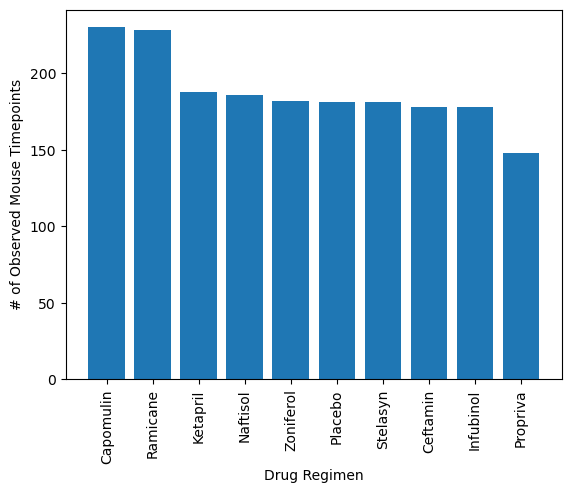

In [11]:
plt.bar(drugs_count.index,drugs_count['Mouse ID'])
plt.xticks(rotation= 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


In [94]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

## Get the unique mice with their gender uning DROPDUPLICATES on the DF

mice_gender = clean_df[['Mouse ID','Sex']].drop_duplicates()
data_pie = mice_gender['Sex'].value_counts()
data_pie

Sex
Male      125
Female    123
Name: count, dtype: int64

Text(0.0, 1.0, 'Count')

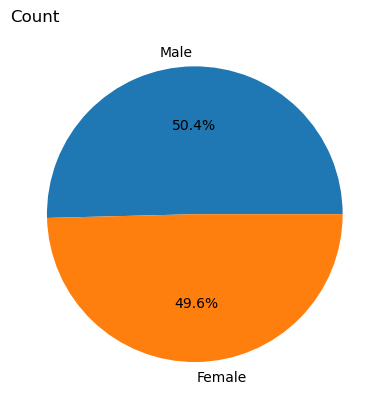

In [95]:
## Make the pie chart
labels = data_pie.index
plt.pie(data_pie, labels=labels, autopct="%1.1f%%")

plt.title('Count', loc='left')


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepointmax = clean_df.groupby(['Mouse ID'])["Timepoint"].max()
timepointmax = pd.DataFrame(timepointmax)
timepointmax.reset_index
timepointmax.head()


,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30


In [16]:

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_last_volume = pd.merge(timepointmax, clean_df, on=["Mouse ID",'Timepoint'])
tumor_last_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [17]:
## filter the tumor colume DF regarding the 4 drugs Capomulin, Ramicane, Infubinol, and Ceftamin

x = (tumor_last_volume['Drug Regimen']== 'Capomulin') | (tumor_last_volume['Drug Regimen']== 'Ramicane') | (tumor_last_volume['Drug Regimen']== 'Infubinol') | (tumor_last_volume['Drug Regimen']== 'Ceftamin' )
    
tumor_last_volume_filt = tumor_last_volume[x]
tumor_last_volume_filt.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [41]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset

list_capomulin = [] 
list_ramicane = [] 
list_infubinol = []  
list_ceftamin = []
newvol = 0

for index, row in tumor_last_volume_filt.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        newvol = row['Tumor Volume (mm3)']
        list_capomulin.append(newvol)
        

    elif row['Drug Regimen'] == 'Ramicane':
        newvol = row['Tumor Volume (mm3)']
        list_ramicane.append(newvol)


    elif row['Drug Regimen'] == 'Infubinol':
        newvol = row['Tumor Volume (mm3)']
        list_infubinol.append(newvol)


    elif row['Drug Regimen'] == 'Ceftamin':
        newvol = row['Tumor Volume (mm3)']
        list_ceftamin.append(newvol)


print(list_ceftamin)

[62.99935619, 45.0, 56.05774909, 55.74282869, 48.72207785, 47.7846818, 61.84902336, 68.92318457, 67.74866174, 57.91838132, 46.78453491, 59.85195552, 64.29983003, 59.74190064, 61.43389223, 64.19234114, 45.0, 52.92534846, 45.0, 67.52748237, 45.0, 64.63494887, 61.38666032, 68.59474498, 64.72983655]


In [56]:
# # Determine outliers using upper and lower bounds

### create empty lists for outliers

list_capomulin_outliers = [] 
list_ramicane_outliers = [] 
list_infubinol_outliers = []  
list_ceftamin_outliers = []

## calculate IQR for each and fill list of outliers

### Capomulin
l1 = np.array(list_capomulin)
q1_capolin = np.quantile(l1,0.25)
q3_capolin = np.quantile(l1,0.75)
iqr_capolin = q3_capolin - q1_capolin
list_capomulin_outliers = l1[(l1>(q3_capolin+(iqr_capolin*1.5))) & (l1<(q1_capolin-(iqr_capolin*1.5)))].tolist()


### Ramicane

L2 = np.array(list_ramicane)
q1_ramicane = np.quantile(L2,0.25)
q3_ramicane = np.quantile(L2,0.75)
iqr_ramicane = q3_ramicane - q1_ramicane
list_ramicane_outliers = L2[(l1>(q3_ramicane+(iqr_ramicane*1.5))) & (L2<(q1_ramicane-(iqr_ramicane*1.5)))].tolist()


### infubinol

L3 = np.array(list_infubinol)
q1_infubinol = np.quantile(L3,0.25)
q3_infubinol = np.quantile(L3,0.75)
iqr_infubinol = q3_infubinol - q1_infubinol
list_infubinol_outliers = L3[(l1>(q3_infubinol+(iqr_infubinol*1.5))) | (L3<(q1_infubinol-(iqr_infubinol*1.5)))].tolist()


### ceftamin

L4 = np.array(list_ceftamin)
q1_ceftamin = np.quantile(L4,0.25)
q3_ceftamin = np.quantile(L4,0.75)
iqr_ceftamin = q3_ceftamin - q1_ceftamin
list_ceftamin_outliers = L4[(l1>(q3_ceftamin+(iqr_ceftamin*1.5))) | (L4<(q1_ceftamin-(iqr_ceftamin*1.5)))].tolist()


print(f'Capomulins potential outliers: {list_capomulin_outliers}')
print(f'Ramicanes  potential outliers: {list_ramicane_outliers}')
print(f'Infubinols  potential outliers: {list_infubinol_outliers}')
print(f'Ceftamins  potential outliers: {list_ceftamin_outliers}')

Capomulins potential outliers: []
Ramicanes  potential outliers: []
Infubinols  potential outliers: [36.3213458]
Ceftamins  potential outliers: []


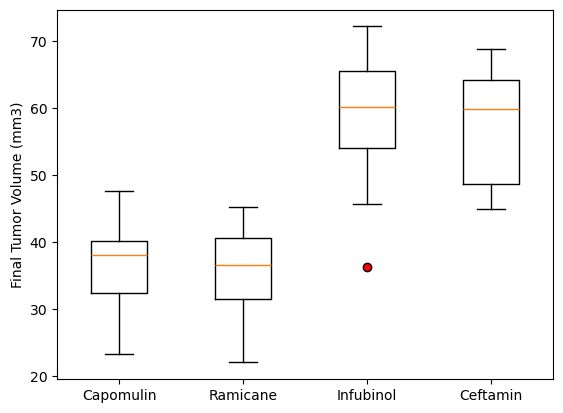

In [53]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


drugs_dictionary = {'Capomulin':list_capomulin, 
                'Ramicane': list_ramicane, 
                'Infubinol' : list_infubinol, 
                'Ceftamin' : list_ceftamin
                }

plt.boxplot(drugs_dictionary.values(), labels=drugs_dictionary.keys(), flierprops={'marker':'o', 'markerfacecolor':'r'})
plt.ylabel("Final Tumor Volume (mm3)")




plt.show()

## Line and Scatter Plots

m601


<function matplotlib.pyplot.show(close=None, block=None)>

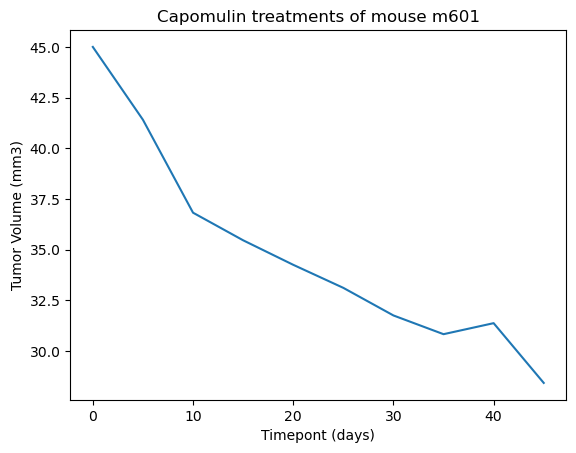

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

## Choose a RANDOM mouse from capomulin tested mice

the_one = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
the_one = the_one['Mouse ID'].unique()
the_one = np.random.choice(the_one,1)
the_one = the_one[0]
print(the_one)

## extract tests on the mouse selected
the_one_journey = clean_df[clean_df['Mouse ID']== the_one]
###print(the_one_journey)

## create the line plot
x_axis = the_one_journey['Timepoint']
y_axis = the_one_journey['Tumor Volume (mm3)']
title_text = f"Capomulin treatments of mouse {the_one}"

plt.plot(x_axis,y_axis)

plt.xlabel('Timepont (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(title_text)

plt.show


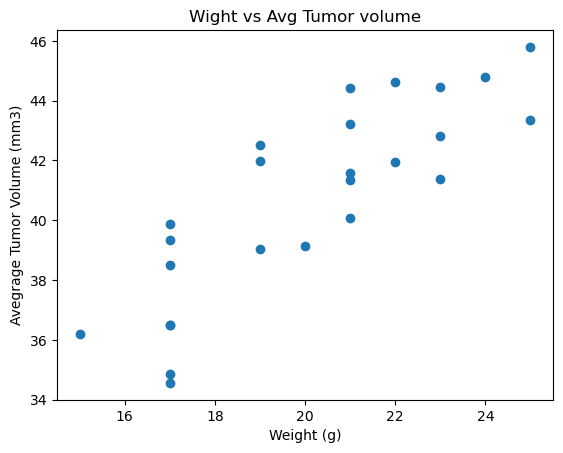

In [87]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## filter druf data and aggregate with groupby both 'Weight' + 'tumor volume' with mean

capomulin_filt = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

capomulin_filt = capomulin_filt.groupby(['Mouse ID','Weight (g)']).agg({
    'Weight (g)' : 'mean',
    'Tumor Volume (mm3)' : 'mean'
    })
capomulin_filt = pd.DataFrame(capomulin_filt)

# print(capomulin_filt)

## scater plot
x_axis2 = capomulin_filt['Weight (g)']
y_axis2 = capomulin_filt['Tumor Volume (mm3)']

plt.scatter(x_axis2,y_axis2)
plt.xlabel('Weight (g)')
plt.ylabel('Avegrage Tumor Volume (mm3)')
plt.title('Wight vs Avg Tumor volume')

plt.show()


## Correlation and Regression

In [92]:
# Calculate the correlation coefficient 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

pearson_r = np.corrcoef(x_axis2,y_axis2)
pearson_r = pearson_r[0,1]
print(f' The correlation between mouse weight and the average tumor volume is {pearson_r}')


 The correlation between mouse weight and the average tumor volume is 0.8419363424694722


In [ ]:
# and a linear regression model
